In [8]:
library(readr)
library(tsintermittent)
library(forecast)
library(tscount)

In [22]:
v <- c(1910,874,1920,350,160,685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,0,16,826,0,66,3798,800,1274,638,192,160,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,276,0,0,1072,80,1776,240,80,528,3081,566,1483,112,272,120,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,0,808,0,0,608,0,1480,184)
t <- ts(v, f=52)

In [ ]:
plot(t)

In [ ]:
crost(t,h=1,outplot=TRUE)$frc.out

In [ ]:
tsb(t,h=1,outplot=TRUE)$frc.out

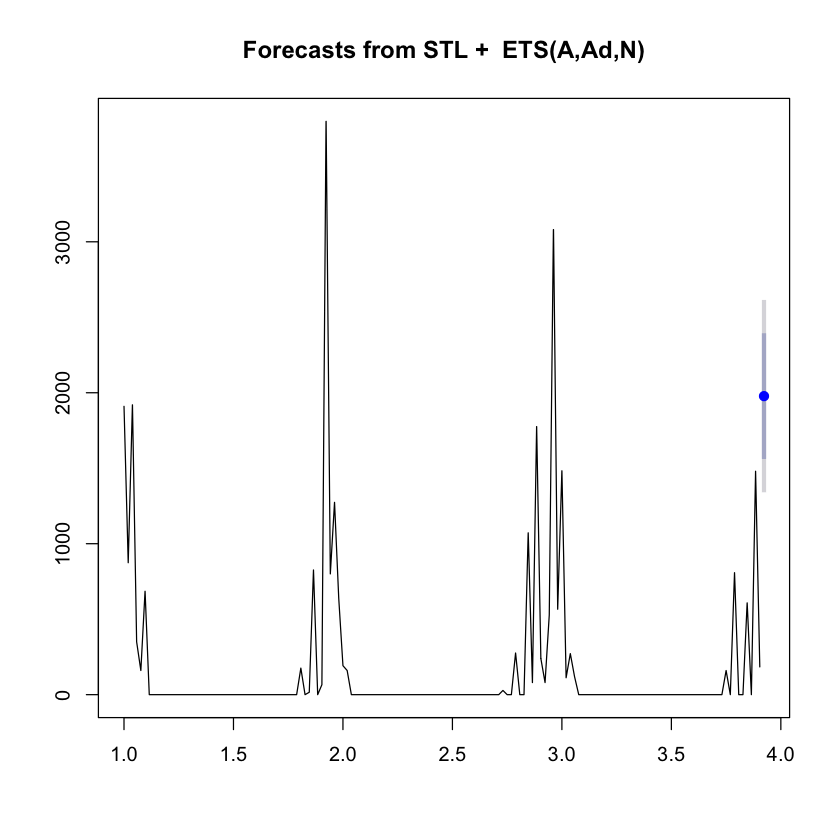

In [6]:
foo <- stlf(t,h = 1)
foo$mean <- pmax(foo$mean,0)
plot(foo)

In [ ]:
model1 <- auto.arima(t, stepwise=FALSE, approximation=FALSE, parallel = TRUE, num.cores = NULL)

In [ ]:
model1

In [ ]:
forecast(model1,1)

In [ ]:
plot(forecast(model1,1))

In [ ]:
fit <- tbats(t, use.box.cox = FALSE)
plot(forecast(fit))

In [3]:
forecast(t,h=1)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
3.923077       1977.688 1561.193 2394.184 1340.713 2614.664

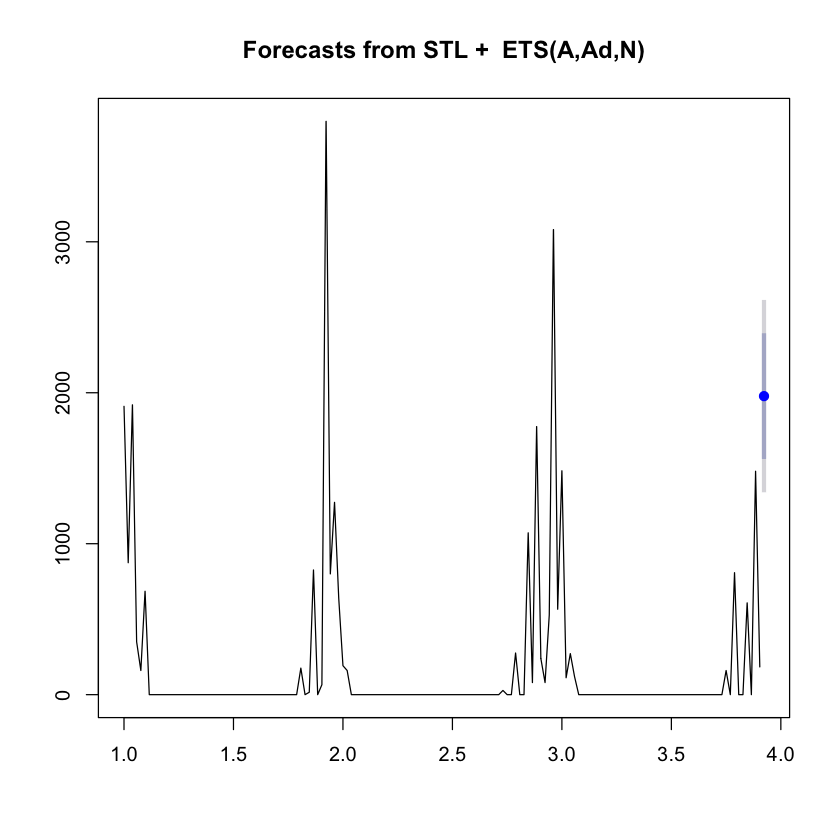

In [5]:
t %>% forecast(h=1) %>% plot

In [27]:
model2 <- tsglm(t, distr="nbinom")

In [28]:
summary(model2)


Call:
tsglm(ts = t, distr = "nbinom")

Coefficients:
             Estimate  Std.Error  CI(lower)  CI(upper)
(Intercept)    176.31       42.8       92.5        260
sigmasq          8.94         NA         NA         NA
Standard errors and confidence intervals (level =  95 %) obtained
by normal approximation.

Link function: identity 
Distribution family: nbinom (with overdispersion coefficient 'sigmasq') 
Number of coefficients: 2 
Log-likelihood: -402.1222 
AIC: 808.2443 
BIC: 814.2921 
QIC: 110396.2 


In [36]:
model2_pred <- predict(model2, n.ahead = 10)

In [37]:
model2_pred

,lower,upper
3.923077,0,1729
3.942308,0,1770
3.961538,0,1232
3.980769,0,1650
4.000000,0,1902
4.019231,0,1952
4.038462,0,1361
4.057692,0,1569
4.076923,0,1576
4.096154,0,1618


In [24]:
model3 <- tsglm(t, distr="poisson")

In [25]:
summary(model3)


Call:
tsglm(ts = t, distr = "poisson")

Coefficients:
             Estimate  Std.Error  CI(lower)  CI(upper)
(Intercept)       176       1.08        174        178
Standard errors and confidence intervals (level =  95 %) obtained
by normal approximation.

Link function: identity 
Distribution family: poisson 
Number of coefficients: 1 
Log-likelihood: -53621.24 
AIC: 107244.5 
BIC: 107247.5 
QIC: 107244.5 


In [26]:
tail(model3$fitted.values,1)

A Time Series:
[1] 176.3092